# Assignment 5
## Diffusion Processes on Complex Networks

Solutions by Kacper Kinastowski

## SIR model 

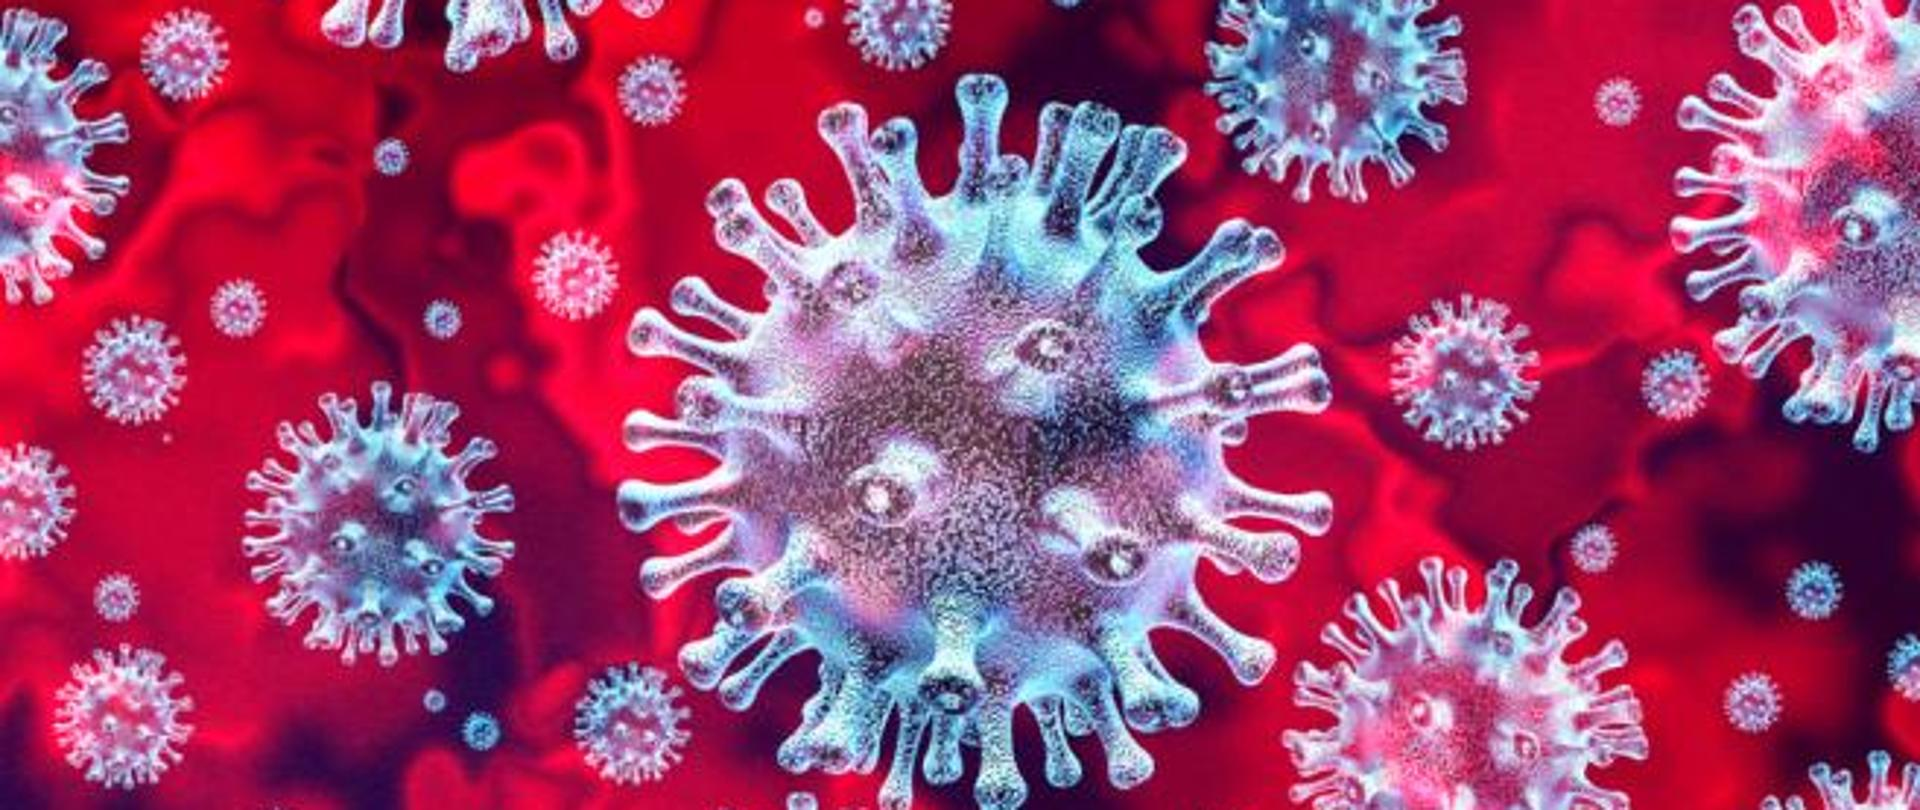

In 1927, W. O Kermack and A. G. McKendrick created a
model in which they considered a fixed population with three compart-
ments: susceptible S, infected I and removed R. Analogous to the prin-
ciples of reaction kinetics, they assumed that encounters between infected
and susceptible individuals occur at a rate proportional to their respec-
tive numbers in the population. The rate of new infections can thus be
defined as βSI, where β is a parameter for infectivity. Moreover, infected
individuals were assumed to recover with a constant probability at any
time, which translates into a constant per capita recovery rate that we
denote with r and thus an overall rate of recovery rI. The model may be
translated into the following set of differential equations:

$$
\frac{dS}{dt} = - \beta S I \\
\frac{dI}{dt} = \beta S I - r I \\
\frac{dR}{dt} = r I
$$

A key parameter in epidemiology is the basic reproductive ratio $R_0$. It is
defined as the average number of secondary cases transmitted by a single
infected individual that is placed into a fully susceptible population. $R_0$
tells us something about the initial rate of spread of the disease. If $R_0 > 1$,
there will be an epidemic and if $R_0 < 1$, the introduced infected will
recover (or die) without being able to replace themselves by new infections.
In the above model it is pretty easy to derive $R_0$. The disease-free state
corresponds to $S = N$, $I = 0$ and $R = 0$. If one infected individual appears
in the population, there will be an epidemic if and only if $dI/dt > 0$.
By replacing $S$ with $N$ in the above equations this yields $\beta N/r > 1$. Thuswe take

$$
R_0 = \frac{\beta N}{r}
$$

## TODO

- Check the formula for $R_0$ by solving the model numerically for differ-ent sets of parameters. Fix $N$ , and vary $\beta$ and $r$. Choose your valuessuch as to have combinations with both $R_0 > 1$ and $R_0 < 1$. Runthe model for each parameter combination, plot the time evolutionof each compartment and record whether there was an epidemic ornot.

- Notice that the basic SIR model can be reduced to a two-dimensionalsystem, because the variable for recovered individuals does not appear in the equations of the other two variables. The reduced SIsystem is thus given by

$$
\frac{dS}{dt} = - \beta S I \\
\frac{dI}{dt} = \beta S I - r I \\
$$

- Phase portraits provide a powerful tool to visualize the dynamics of ODE systems. For a fixed set of parameters, draw a phase portrait with trajectories corresponding to different initial conditions. (Hint: cuiver command in the matplotlib library)

- For different combinations of $r$ and $\beta$ determine the total number of individuals infected during an epidemic and then calculate R0 for each parameter set. Plot the total number of infections as a function of $R_0$



In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import random
import os
from scipy.integrate import odeint

## Task 1 -  SIR Implementation


### Sir class

The `Sir` class represents a simple implementation of the Susceptible-Infected-Recovered (SIR) model, which is a mathematical model used to study the spread and dynamics of infectious diseases in a population. This class provides methods to solve the SIR model equations and plot the results.

### Class Attributes:
- `N`: The initial population size.
- `I0`: The initial number of infected individuals.
- `R0`: The initial number of recovered individuals.
- `S0`: The initial number of susceptible individuals (`N - I0 - R0`).
- `beta`: The infection rate parameter, representing the average number of contacts an infected individual has per day.
- `r`: The recovery rate parameter, representing the average number of infected individuals who recover per day.
- `t`: A numpy array representing the time interval over which the SIR model is solved.
- `S`: An array that will store the number of susceptible individuals at each time step.
- `I`: An array that will store the number of infected individuals at each time step.
- `R`: An array that will store the number of recovered individuals at each time step.

### Class Methods:
- `__init__(self, initial_population, beta, r, initial_infected_count=1, initial_recovered_count=0)`: The constructor method for the `Sir` class. It initializes the instance with the specified parameters and calculates the initial values of `S0`, `I0`, and `R0`.
- `deriv(self, y, t)`: A method that defines the SIR model equations. It takes the current state `y` (consisting of `S`, `I`, and `R`) and time `t` as inputs, and returns the derivatives of `S`, `I`, and `R` with respect to time.
- `solve(self)`: A method that solves the SIR model equations using the `odeint` function from the `scipy.integrate` module. It sets the values of `S`, `I`, and `R` based on the solution obtained.
- `solve_and_plot(self)`: A method that solves the SIR model equations and plots the results. It calls the `solve` method to obtain the solution and uses `matplotlib.pyplot` to generate a line plot showing the variation of `S`, `I`, and `R` over time. The plot includes axis labels, a title indicating the values of `N`, `beta`, and `r`, and a legend.


In [63]:
class Sir:
    def __init__(
        self, 
        initial_population, 
        beta, 
        r,
        initial_infected_count = .001, 
        initial_recovered_count = 0
    ):
        self.N = initial_population
        self.I0 = initial_infected_count
        self.R0 = initial_recovered_count
        self.S0 = self.N - self.I0 - self.R0
        self.beta = beta
        self.r = r
        self.t = np.linspace(0, 160, 160)
        self.S = None
        self.I = None
        self.R = None
    
    def _deriv(self, y, t):
        S, I, R = y
        dSdt = -self.beta * S * I / self.N
        dIdt = self.beta * S * I / self.N - self.r * I
        dRdt = self.r * I
        return dSdt, dIdt, dRdt
    
    def solve(self):
        y0 = self.S0, self.I0, self.R0
        ret = odeint(self._deriv, y0, self.t)
        self.S, self.I, self.R = ret.T
    
    def solve_and_plot(self):
        self.solve()
        plt.plot(self.t, self.S, label='Susceptible')
        plt.plot(self.t, self.I, label='Infected')
        plt.plot(self.t, self.R, label='Recovered')
        plt.xlabel('Time [days]')
        plt.ylabel('Population [#]')
        plt.title(f'N = {self.N}, beta = {self.beta}, r = {self.r}')
        plt.legend()
        plt.show()


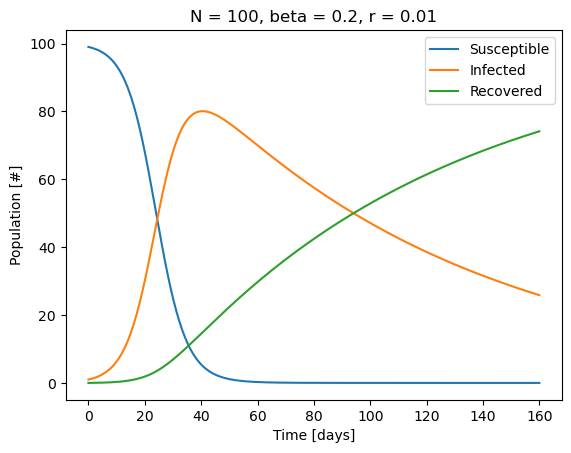

In [3]:
# Usage example
x = Sir(100, 0.2, .01)
x.solve_and_plot()

## Check if simulation is correct

Evaluation for $r=1/3$, $\beta = 1/2$ and initial conditions:

$$
S(0) = 7.9 \cdot 10 ^ 6, I(0) = 10, R(0) = 0,
$$

or rescaled:

$$
S(0) = 1, I(0) = \cdot 1.27 ^ {-6}, R(0) = 0,
$$

evaluation from: https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

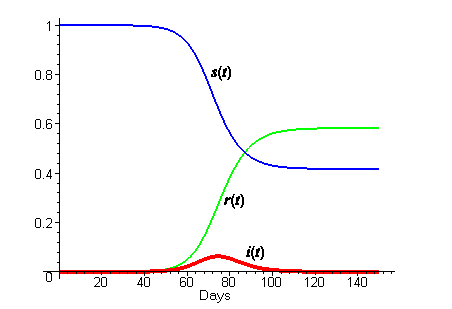

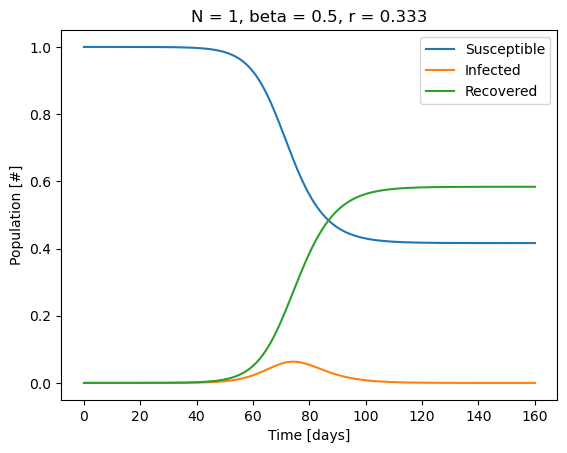

In [23]:
r = .333
beta  = .5
x = Sir(1, beta, r, initial_infected_count = 1.27 * 10 ** (-6),
        initial_recovered_count = 0)
x.solve_and_plot()

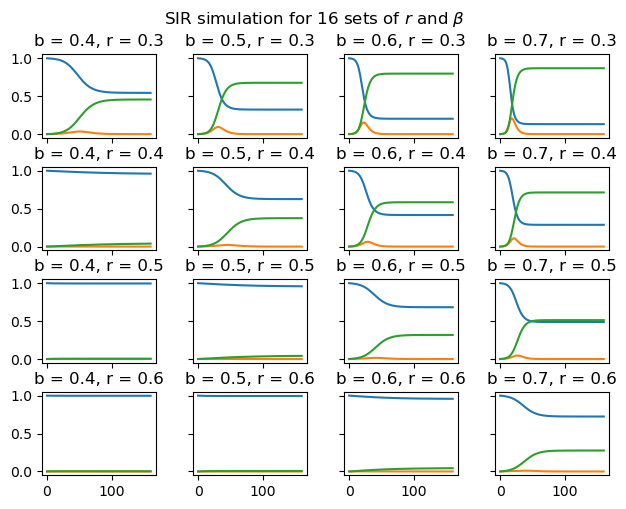

In [64]:
r_list = [.3, .4, .5, .6]
beta_list = [.4, .5, .6, .7]

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig.tight_layout()

for i, r in enumerate(r_list):
    for j, beta in enumerate(beta_list):
        sir = Sir(1, beta, r)
        sir.solve()
        ax[i, j].plot(sir.t, sir.S)
        ax[i, j].plot(sir.t, sir.I)
        ax[i, j].plot(sir.t, sir.R)
        ax[i, j].title.set_text(f'b = {beta}, r = {r}')
        


fig.suptitle(r'SIR simulation for 16 sets of $r$ and $\beta$', y = 1.05)
plt.show()



## Phase portrait

Phase portrait for SIR $I(t)(S(t))$ for different initial infected number $I(0) = {0, 5, .. 100}$

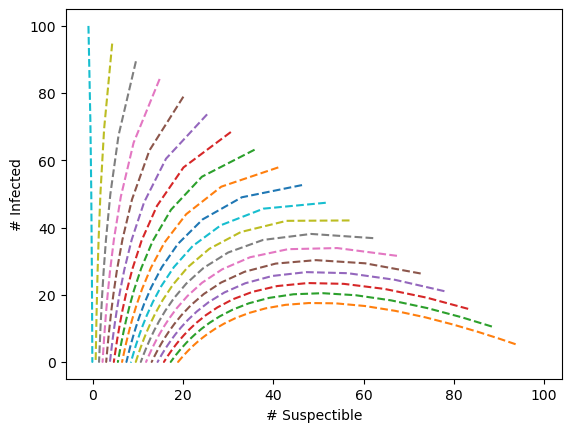

In [6]:
infected_number = np.linspace(0, 100, 20)

for i_0 in infected_number:
    sir = Sir(initial_population = 100, 
            beta = 0.66, 
            r = 0.33,
            initial_infected_count = i_0,
            initial_recovered_count = 1)
            

    sir.solve()
    plt.plot(sir.S, sir.I, '--')
    plt.xlabel('# Suspectible')
    plt.ylabel('# Infected')
plt.show()

## Task 2 - Infection simulation on a graph

SIR model on a network You are given a graph representing the contact
network. So an edge between the nodes v and w means that if v becomes
infected at some point, the disease has the potential to spread directly to
w. Each node may go through the Susceptible-Infectious-Removed cycle.
The progress of the epidemic is controlled by the contact network structure
and an additional quantity: the probability of contagion p (for the sake of
simplicity we assume that the length of the infection is exactly one time
step). You should simulate the dynamics synchronously as follows (one
Monte Carlo steps corresponds to a loop over all nodes in the network).

In [7]:
def infection_simulation(G: nx.Graph, p: float, source: int = 0):

    #setting all nodes as susceptible
    states={node:0 for node in G.nodes()}
    nx.set_node_attributes(G,states,"state")
    source=list(G.nodes())[source]
    G.nodes[source]['state']=1
    infects=[]
    step=0
    #step_graphs=[] #list of graphs at each MCS
    
    while True: #loop if there are still infected people
        #step_graphs.append(G)
        curr_states=nx.get_node_attributes(G, "state")
        
        infected = [x for x,y in G.nodes(data=True) if y['state']==1] # take all the infected nodes
        infects.append((step,len(infected)))
        for i in infected:
            
            targets=nx.neighbors(G,i) #targets that the infection can spread to
            for t in targets:

                prob=np.random.uniform()
                if prob<p and G.nodes[t]['state']==0:
                    G.nodes[t]['state']=1
                    
            G.nodes[i]['state']=-1

        if 1 not in curr_states.values(): # if no infected remain break the loop
            break
        step+=1
    return infects,G


In [8]:
class InfectionSimulation:
    def __init__(self, G: nx.Graph, p: float, source: int):
        self.G = G
        self.p = p
        self.source = source
        self.states = {node: 0 for node in G.nodes()}
        nx.set_node_attributes(self.G, self.states, "state")
        self.source = list(self.G.nodes())[self.source]
        self.G.nodes[self.source]['state'] = 1
        self.infects = []
        self.step = 0

    def simulate(self):
        while True:
            curr_states = nx.get_node_attributes(self.G, "state")
            infected = [x for x, y in self.G.nodes(data=True) if y['state'] == 1]
            self.infects.append((self.step, len(infected)))

            for i in infected:
                targets = nx.neighbors(self.G, i)
                for t in targets:
                    prob = np.random.uniform()
                    if prob < self.p and self.G.nodes[t]['state'] == 0:
                        self.G.nodes[t]['state'] = 1

                self.G.nodes[i]['state'] = -1

            if 1 not in curr_states.values():
                break
            self.step += 1

        return self.infects, self.G

In [9]:
def calculate_averages(arrays):
    max_length = max(len(array) for array in arrays)  # Find the length of the largest array
    averages = []
    for i in range(max_length):
        total = 0
        count = 0
        for array in arrays:
            if i < len(array):
                total += array[i]
                count += 1
        average = total / count if count > 0 else 0  # Calculate the average or use zero if count is zero
        averages.append(average)
    return averages

def multiple_simulations_infections_time(G, p, N_simulations, index_0):
    avg_infection_list = []
    max_time  = 0
    infected_arrays = []
    N = G.number_of_nodes()
    
    for i in range(N_simulations):
        simulation = InfectionSimulation(G, p, index_0)
        infects, final_graph = simulation.simulate()

        time_list, infection_number_list = zip(*infects)
        time_list = list(time_list)
        infection_number_list = list(infection_number_list)


        if len(time_list) > max_time:
            max_time = len(time_list)

        infected_arrays.append(infection_number_list)


    averaged_infections_array = calculate_averages(infected_arrays)
    averaged_infections_to_helathy_ratio_array = [float(number)/float(N) for number in averaged_infections_array]
    
    return range(max_time), averaged_infections_to_helathy_ratio_array

## Infection on graph - evaluation of models

### Performance and quality

- 1000 simulations, 400 agents - **1 min 56 s** - some distortion for large $t$.

- 5000 simulations, 900 agents - **16 min 26s** - some distortion for large $t$.

In [82]:
N_simulations = 1000
probabilities = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
index_0 = 0
size = 400

square_lattice_graph=nx.grid_2d_graph(20,20)
random_graph=nx.gnp_random_graph(400,0.05)
ws_graph=nx.watts_strogatz_graph(400,4,0.05)
ba_graph=nx.barabasi_albert_graph(400,3)

graph_list = [
    (square_lattice_graph, 'Square lattice'), 
    (random_graph, 'Random graph'),
    (ws_graph, 'Watt-Strogatz graph'), 
    (ba_graph, 'Barabasi-Alberts graph')
]

## About inspected graphs

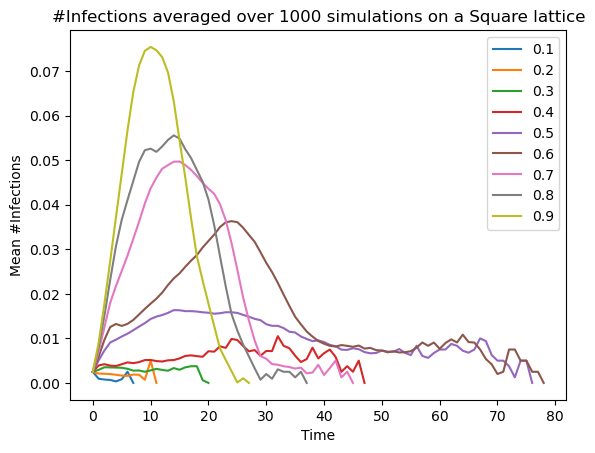

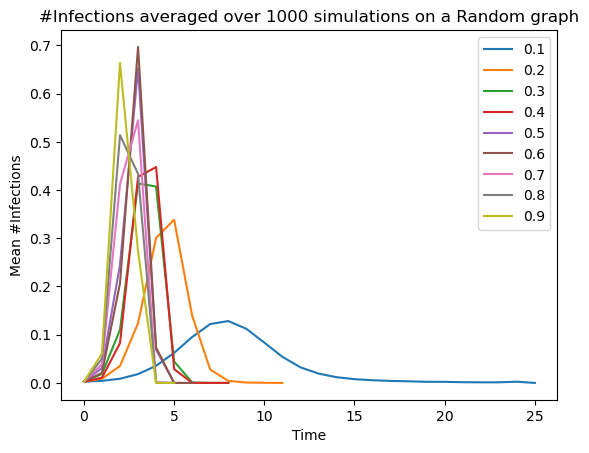

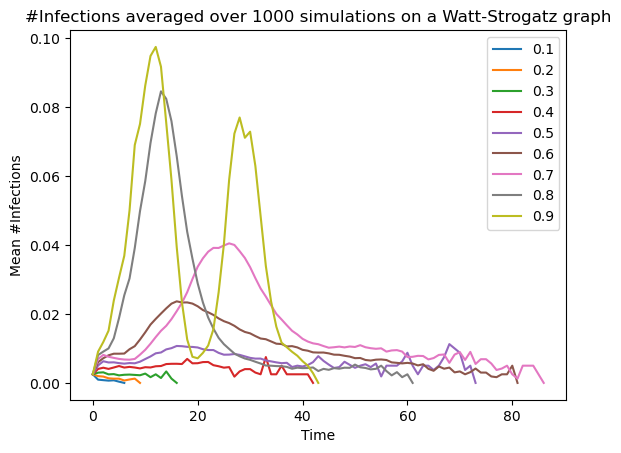

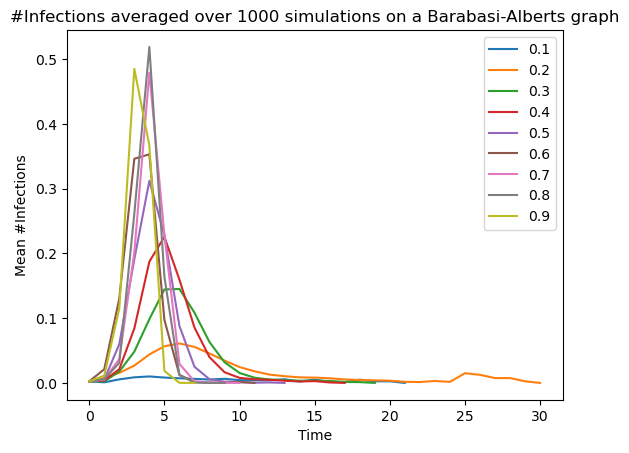

Wall time: 4min 59s


In [83]:
%%time

for graph_and_name_tuple in graph_list:
    for p in probabilities:
        t, i = multiple_simulations_infections_time(graph_and_name_tuple[0], 
                                                    p, 
                                                    N_simulations, 
                                                    random.choice(range(size))
                                                   )
        plt.plot(t, i, label = p)


    plt.xlabel('Time')
    plt.ylabel('Mean #Infections')
    plt.legend()
    plt.title(f'#Infections averaged over {N_simulations} simulations on a {graph_and_name_tuple[1]}')
    plt.show()

## Total infections - probability dependence

In [84]:
def multiple_simulations_probability(G, p, N_simulations, index_0):
    avg_infection_list = []
    max_time  = 0
    infected_arrays = []
    N = G.number_of_nodes()
    mean_infections = 0
    
    for i in range(N_simulations):
        simulation = InfectionSimulation(G, p, index_0)
        infects, final_graph = simulation.simulate()

        time_list, infection_number_list = zip(*infects)
        time_list = list(time_list)
        infection_number_list = list(infection_number_list)


        if len(time_list) > max_time:
            max_time = len(time_list)

        infected_arrays.append(infection_number_list)
        
    mean_infections += np.sum(infection_number_list)
    mean_infections/ N_simulations 

    averaged_infections_array = calculate_averages(infected_arrays)
    averaged_infections_to_helathy_ratio_array = [float(number)/float(N) for number in averaged_infections_array]
    
    return range(max_time), mean_infections / N


## example usage

mean_infs0 = []
mean_infs1 = []
mean_infs2 = []
mean_infs3 = []

ps = np.arange(0, 1.05, 0.05)

for p in ps:
    t0, mean_inf0 = multiple_simulations_probability(ba_graph, p, 10, 0)
    mean_infs0.append(mean_inf0)
    
    t1, mean_inf1 = multiple_simulations_probability(ws_graph, p, 10, 0)
    mean_infs1.append(mean_inf1)
    
    t2, mean_inf2 = multiple_simulations_probability(square_lattice_graph, p, 10, 0)
    mean_infs2.append(mean_inf2)
    
    t3, mean_inf3 = multiple_simulations_probability(random_graph, p, 10, 0)
    mean_infs3.append(mean_inf3)


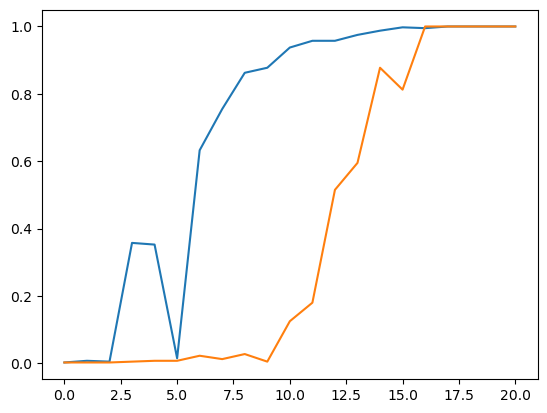

In [85]:
plt.plot(mean_infs0)
plt.plot(mean_infs1) 

In [ ]:
%%time
N_simulations = 10

probability_list = np.arange(0, 1.05, 0.05)
mean_infections_list = []

for graph_and_name_tuple in graph_list:
    mean_inf_list = []
    for p in probability_list:
        t, mean_inf = multiple_simulations_probability(
            graph_and_name_tuple[0], 
            p, 
            N_simulations, 
            random.choice(range(size))
        )
        
        mean_inf_list.append(mean_inf)
        
    plt.plot(probability_list, mean_inf_list, label = graph_and_name_tuple[1])
plt.xlabel('Probability of infection')
plt.ylabel('Mean Total #Infections')
plt.title(f'Total Fractions of Infected averaged over {N_simulations} simulations')
plt.legend()
plt.show()